In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer

%matplotlib inline

In [3]:
cancer = load_breast_cancer()

In [4]:
print(cancer.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [5]:
features = pd.DataFrame(cancer.data, columns = cancer.feature_names )
target = pd.DataFrame(cancer.target, columns = ['target'])

In [6]:
data = pd.concat([features, target], axis=1)

In [7]:
data.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


In [8]:
# See the correlation between input data and the output
a = data.corr('pearson')

In [9]:
a.loc['target'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

In [41]:
x = np.array(data['worst concave points'])
y = np.array(data['target'])

x = x/x.mean()

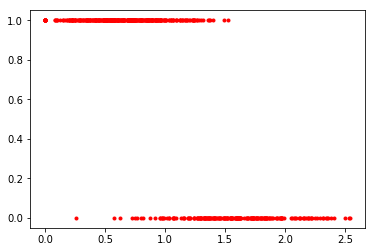

In [42]:
plt.plot(x,y, 'r.')

In [43]:
# Separate the data into training data and test data
div = int(0.8 * len(x))

x_train = x[:div]
y_train = y[:div]

x_test = x[div:]
y_test = y[div:]

In [44]:
# Our Hypothesis is a sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [45]:
# Write a function to calculate squared error
def sqerror(a, b, x, y):
    error = 0
    N = len(x)
    for i in range(N):
        f = (a * x[i]) + b
        error += (y[i]- sigmoid(f))**2
    return error

In [46]:
# One Gradient Step
def step_gradient(a,b,x,y,learning_rate):
    grad_a = 0
    grad_b = 0
    m = len(x)
    for i in range(m):
        f = (a * x[i]) + b
        grad_a += (sigmoid(f) - y[i]) * x[i]
        grad_b += (sigmoid(f) - y[i])
        
    a = a - (grad_a * learning_rate)
    b = b - (grad_b * learning_rate)
    return a,b


#Performing Gradient Descent
def descend(initial_a, initial_b, x, y, learning_rate, iterations):
    a, b, = initial_a, initial_b
    for i in range(iterations):
        e = sqerror(a, b, x, y)
        if i % 1000 == 0:
            print("Error: %4f a, b =%4f, %4f " %(e, a, b))
        a,b = step_gradient(a, b, x, y, learning_rate)
        
    return a,b



In [52]:
a, b = 1, 1
learning_rate = 0.01
iterations = 10000

final_a, final_b = descend(a, b, x_train, y_train, learning_rate, iterations)

Error: 167.362003 a, b =1.000000, 1.000000 
Error: 30.314622 a, b =-6.848992, 7.721234 
Error: 30.314624 a, b =-6.849035, 7.721282 
Error: 30.314624 a, b =-6.849035, 7.721282 
Error: 30.314624 a, b =-6.849035, 7.721282 
Error: 30.314624 a, b =-6.849035, 7.721282 
Error: 30.314624 a, b =-6.849035, 7.721282 
Error: 30.314624 a, b =-6.849035, 7.721282 
Error: 30.314624 a, b =-6.849035, 7.721282 
Error: 30.314624 a, b =-6.849035, 7.721282 


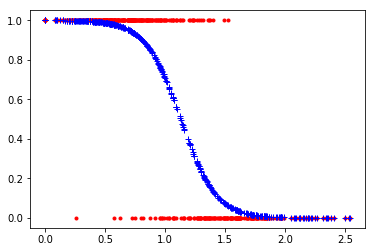

In [53]:
f = (final_a * x_train) + final_b
plt.plot(x_train, y_train, 'r.', x_train, sigmoid(f), 'b+')

In [10]:
def accuracy(a,x,b,y):
    correct = 0
    for i in range(len(x)):
        f = (a * x[i]) + b
        prediction = sigmoid(f)
        if prediction > 0.5:
            z = 1
        else:
            z = 0
        if y[i] == z:
            correct += 1
            
    print("Accuracy: {}".format(correct / len(y_train)))

In [11]:
accuracy(final_a, x_train, final_b, y_train)

NameError: name 'final_a' is not defined

In [12]:
# Accuracy falls as you move away from training data.
accuracy(final_a, x_test, final_b, y_test)

NameError: name 'final_a' is not defined

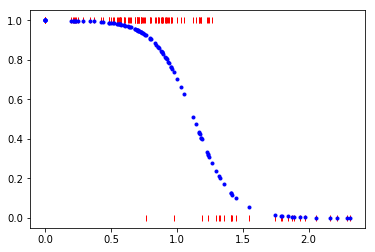

In [90]:
f = (final_a * x_test) + final_b
plt.plot(x_test, y_test, "r|", x_test, sigmoid(f), 'b.')